# SVM VS LR

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

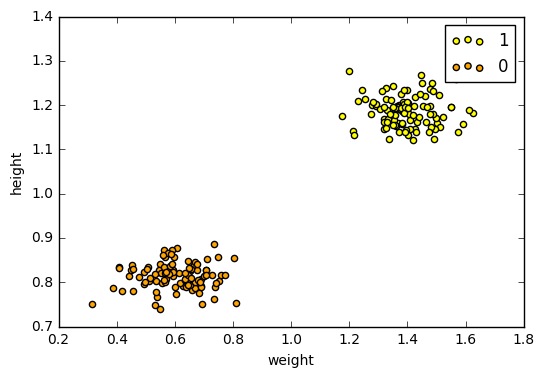

In [2]:
m = 100 # 데이터 개수(sample, example)

# 어른 키와 몸무게
adult_height = np.random.normal(175, 5, [m, 1])
adult_weight = np.random.normal(70, 5, [m, 1])
adult_dataset = np.concatenate((adult_weight, adult_height), axis = 1)

# 아이 키와 몸무게
child_height = np.random.normal(120, 5, [m, 1])
child_weight = np.random.normal(30, 5, [m, 1])
child_dataset = np.concatenate((child_weight, child_height), axis = 1)

total_dataset = np.concatenate((adult_dataset , child_dataset))

# 어른 : 1, 아이 : 0
adult_label = np.ones(shape=[m,1])
child_label = np.zeros(shape=[m,1])
total_label = np.concatenate((adult_label, child_label))

total = np.concatenate((total_dataset , total_label), axis=1)


# scaling
weight_mean= total[:, 0].mean()
height_mean= total[:, 1].mean()
total[:, 0] /= weight_mean
total[:, 1] /= height_mean

plt.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
plt.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
plt.show()

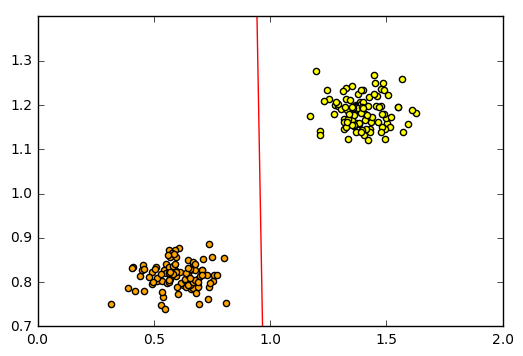

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

x = total[:, :2] # weight, height
y = total[:, 2:3] # label
reshaped_y = y.reshape((200,))

model.fit(x,reshaped_y)

w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
b = model.intercept_[0]

plt.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
plt.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
line_x = np.linspace(0.2,1.8,1000)
line_y = -(w1/w2)*line_x - b/w2 # w1x1 + w2x2 + b = 0 (x2 = -(w1/w2)x1 + (b/w2))
plt.ylim(0.7,1.4)
plt.plot(line_x, line_y, 'r')
plt.show()

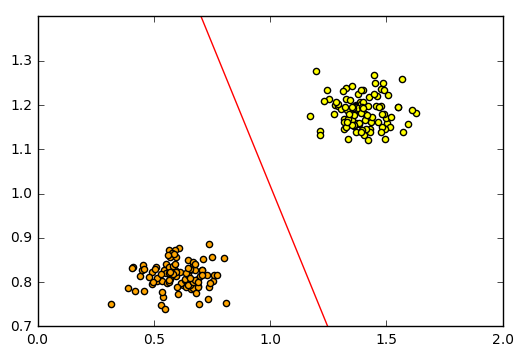

In [4]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x,reshaped_y)

new_w1 = clf.coef_[0][0]
new_w2 = clf.coef_[0][1]
new_b = clf.intercept_[0]

plt.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
plt.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
line_x = np.linspace(0.2,1.8,1000)
line_y = -(new_w1/new_w2)*line_x - new_b/new_w2 # w1x1 + w2x2 + b = 0 (x2 = -(w1/w2)x1 + (b/w2))
plt.ylim(0.7,1.4)
plt.plot(line_x, line_y, 'r')
plt.show()

# Import libraries

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

# Data preparation

In [24]:
x = np.random.randn(200,2)
y = np.logical_xor(x[:,0]>0, x[:,1]>0)
y = np.where(y, 1, 0)

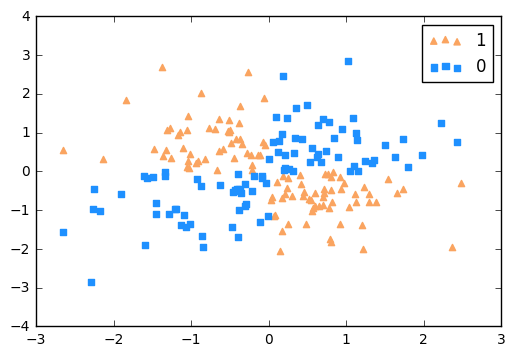

In [59]:
plt.scatter(x[y==1, 0], x[y==1, 1], color='sandybrown', marker='^', label='1')
plt.scatter(x[y==0, 0], x[y==0, 1], color='dodgerblue', marker='s', label='0')
plt.legend()
plt.show()

# Model

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [46]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Performance

In [47]:
pred = svm_model.predict(x_test)
pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0])

In [48]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [52]:
print ('총 테스트 개수 : %d, 오류 개수 : %d' %(len(x_test), (pred != y_test).sum()))
print ('정확도 : %.2f' %accuracy_score(y_test, pred))

총 테스트 개수 : 60, 오류 개수 : 7
정확도 : 0.88


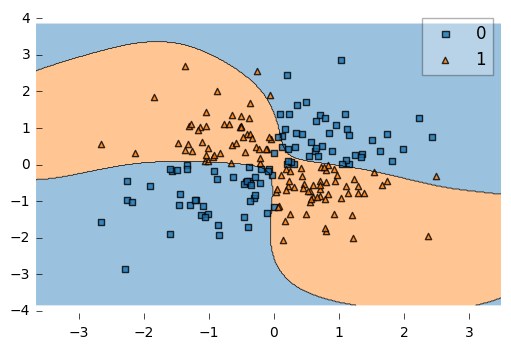

In [57]:
plot_decision_regions(x,y,clf=svm_model)